<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [3]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [4]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

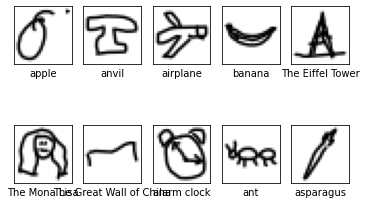

In [5]:
import matplotlib.pyplot as plt

start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

from numpy import argmax


In [7]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.33, shuffle= True)


In [8]:
#  compare Adamn with SGD optimizer 

NUM_EPOCHS = 20     #

model = keras.Sequential(
    [   layers.Input(shape=(784,)),
        layers.Dense(380, activation="relu", name="layer1"),
        layers.Dense(50, activation="relu", name="layer2"),
        layers.Dense(10, activation="softmax", name="output"),
    ]
)
model.summary()

model.compile(
             loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

adam = model.fit(X,y, 
                    epochs=NUM_EPOCHS,
                    validation_split=0.3
                    )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 380)               298300    
_________________________________________________________________
layer2 (Dense)               (None, 50)                19050     
_________________________________________________________________
layer3 (Dense)               (None, 10)                510       
Total params: 317,860
Trainable params: 317,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2188/2188 [==============================] - 5s 2ms/step - loss: 2.1871 - accuracy: 0.3038 - val_loss: 1.6982 - val_accuracy: 0.3602
Epoch 2/20
2188/2188 [==============================] - 5s 2ms/step - loss: 1.5495 - accuracy: 0.4062 - val_loss: 1.3319 - val_accuracy: 0.5052
Epoch 3/20
2188/2188 [==============================] - 5s 2ms/step - loss: 1.1547 - accurac

In [ ]:
# new model2 using SGD
from keras.callbacks import EarlyStopping

holdupwait = EarlyStopping(patience=10, restore_best_weights=True)

model2 = keras.Sequential(
    [   layers.Input(shape=(784,)),
        layers.Dense(380, activation="relu", name="layer1"),
        layers.Dense(50, activation="relu", name="layer2"),
        layers.Dense(10, activation="softmax", name="layer3"),
    ]
)
model2.summary()

learn_rate = 0.001                           # this would need to be tuned, def 0.01
sgd = keras.optimizers.SGD(lr=learn_rate)

model2.compile(
             loss='sparse_categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])
model2_hist = model2.fit(X,y, 
                    epochs=NUM_EPOCHS,
                    validation_split=0.3,
                    callbacks= holdupwait

                    )

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 380)               298300    
_________________________________________________________________
layer2 (Dense)               (None, 50)                19050     
_________________________________________________________________
layer3 (Dense)               (None, 10)                510       
Total params: 317,860
Trainable params: 317,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2188/2188 [==============================] - 6s 3ms/step - loss: 2.1102 - accuracy: 0.3324 - val_loss: 2.0872 - val_accuracy: 0.4170
Epoch 2/20
2188/2188 [==============================] - 6s 3ms/step - loss: 1.5476 - accuracy: 0.4664 - val_loss: 1.4827 - val_accuracy: 0.4843
Epoch 3/20
2188/2188 [==============================] - 6s 3ms/step - loss: 1.4027 - accur

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

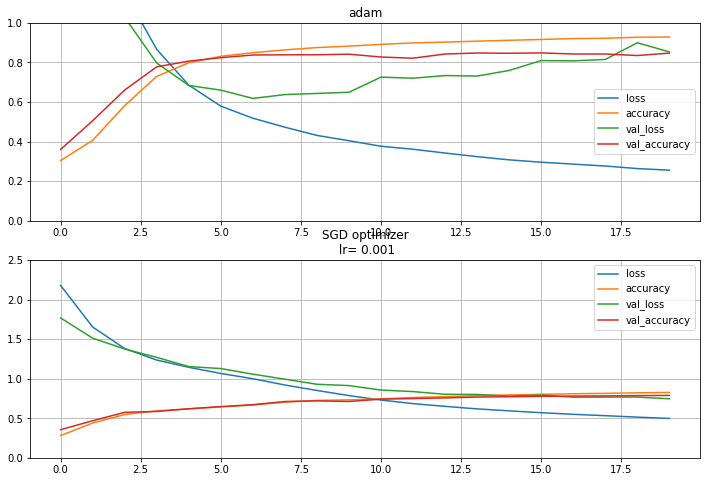

In [25]:
import pandas as pd
fig,axs= plt.subplots(2)

pd.DataFrame(adam.history).plot(figsize=(12,8), title='adam', ax=axs[0])

pd.DataFrame(model2_hist.history).plot(figsize=(12,8), title=f"SGD optimizer\n lr= {learn_rate}", ax=axs[1])
axs[0].grid(True)
axs[1].grid(True)
axs[0].set_ylim(0,1) 
axs[1].set_ylim(0,2.5) 

plt.show()

In [31]:
## for local only -- log history for tensorboard vis

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id= time.strftime("run_%Y_%m_d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model2.fit(X,y, 
                    epochs=NUM_EPOCHS,
                    validation_split=0.3, 
                    callbacks=[tensorboard_cb]
                    )

Epoch 1/20
   1/2188 [..............................] - ETA: 0s - loss: 0.1241 - accuracy: 0.9375WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2188/2188 [==============================] - 6s 3ms/step - loss: 0.3005 - accuracy: 0.8902 - val_loss: 0.9408 - val_accuracy: 0.8073
Epoch 2/20
2188/2188 [==============================] - 6s 3ms/step - loss: 0.2958 - accuracy: 0.8921 - val_loss: 0.9322 - val_accuracy: 0.8031
Epoch 3/20
2188/2188 [==============================] - 6s 3ms/step - loss: 0.2905 - accuracy: 0.8928 - val_loss: 0.9612 - val_accuracy: 0.8032
Epoch 4/20
2188/2188 [==============================] - 6s 3ms/step - loss: 0.2854 - accuracy: 0.8951 - val_loss: 0.9590 - val_accuracy: 0.8082
Epoch 5/20
2188/2188 [==============================] - 6s 3

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [32]:
%load_ext tensorboard
%tensorboard -- logdir=./my_logs --p=6006

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2020-08-11 04:11:02.154121: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT]
                   [--

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 

 if the task was 1 or zero  I would use a binary crosssentropy for loss with a sigmoid activation fn on the output layer


2. What is the difference between a loss function and a metric? Why might we need both in Keras?

The loss metric quantifies the error between an specific set of predictions and the known values of y.

 The function determines how much to change the weights based on successive runs and the metrics. we use the loss function to calculate the metric between successive runs, in order to stop iterating when we have reached a minimum 

3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that?
 What do newer optimizers such as `adam` have to offer? 

Adam has an adaptive per parameter learning rate, vs a single global learnign rate for all 


## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)